In [ ]:
#importing libraries
#importing pandas
imporimportt pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# **Data Set**

---



In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/hour.csv'

In [ ]:
df=pd.read_csv(path)
df


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# **Data Pre Processing**

---



In [ ]:
df = df.drop_duplicates()

In [ ]:
df=df.drop(columns=['instant'])

In [ ]:
columns=df.columns

**Retitile the column names**

---



In [ ]:
new_columns= {'dteday': 'Date', 'weekday': 'Day','weathersit':'weather','yr':'year','hr':'hour','cnt':'count','mnth':'month'}
df.rename(columns=new_columns, inplace=True)

In [ ]:
df.columns

Index(['Date', 'season', 'year', 'month', 'hour', 'holiday', 'Day',
       'workingday', 'weather', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [ ]:
df

,Date,season,year,month,hour,holiday,Day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# **Data Quality Check**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        17379 non-null  object 
 1   season      17379 non-null  int64  
 2   year        17379 non-null  int64  
 3   month       17379 non-null  int64  
 4   hour        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   Day         17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  count       17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,season,year,month,hour,holiday,Day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.isnull().sum()

Date          0
season        0
year          0
month         0
hour          0
holiday       0
Day           0
workingday    0
weather       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.nunique()

Date          731
season          4
year            2
month          12
hour           24
holiday         2
Day             7
workingday      2
weather         4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
count         869
dtype: int64

# **Exploratory Data Analysis(EDA)**

---



# **Scatter Plot**

---



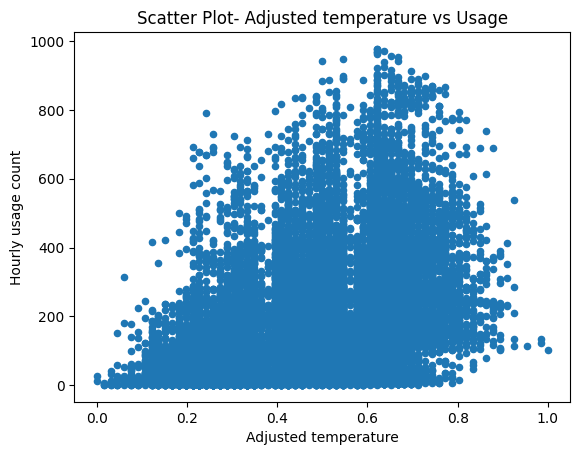

In [ ]:
# Create a scatter plot
df.plot(x='atemp', y='count', kind='scatter')

# Customize the plot
plt.title('Scatter Plot- Adjusted temperature vs Usage')
plt.xlabel('Adjusted temperature')
plt.ylabel('Hourly usage count')

# Display the plot
plt.show()


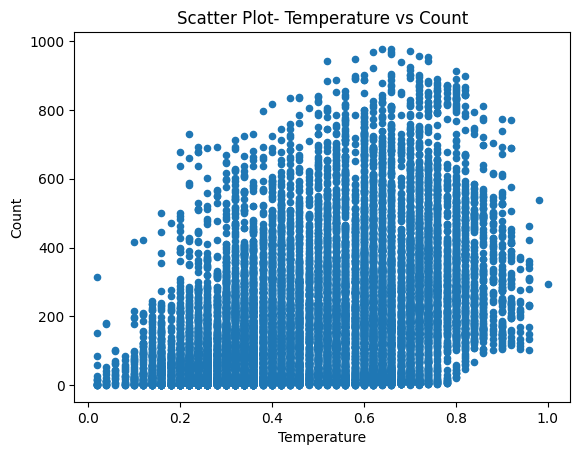

In [ ]:
# Create a scatter plot
df.plot(x='temp', y='count', kind='scatter')

# Customize the plot (optional)
plt.title('Scatter Plot- Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Display the plot
plt.show()


# **Box Plot**

---



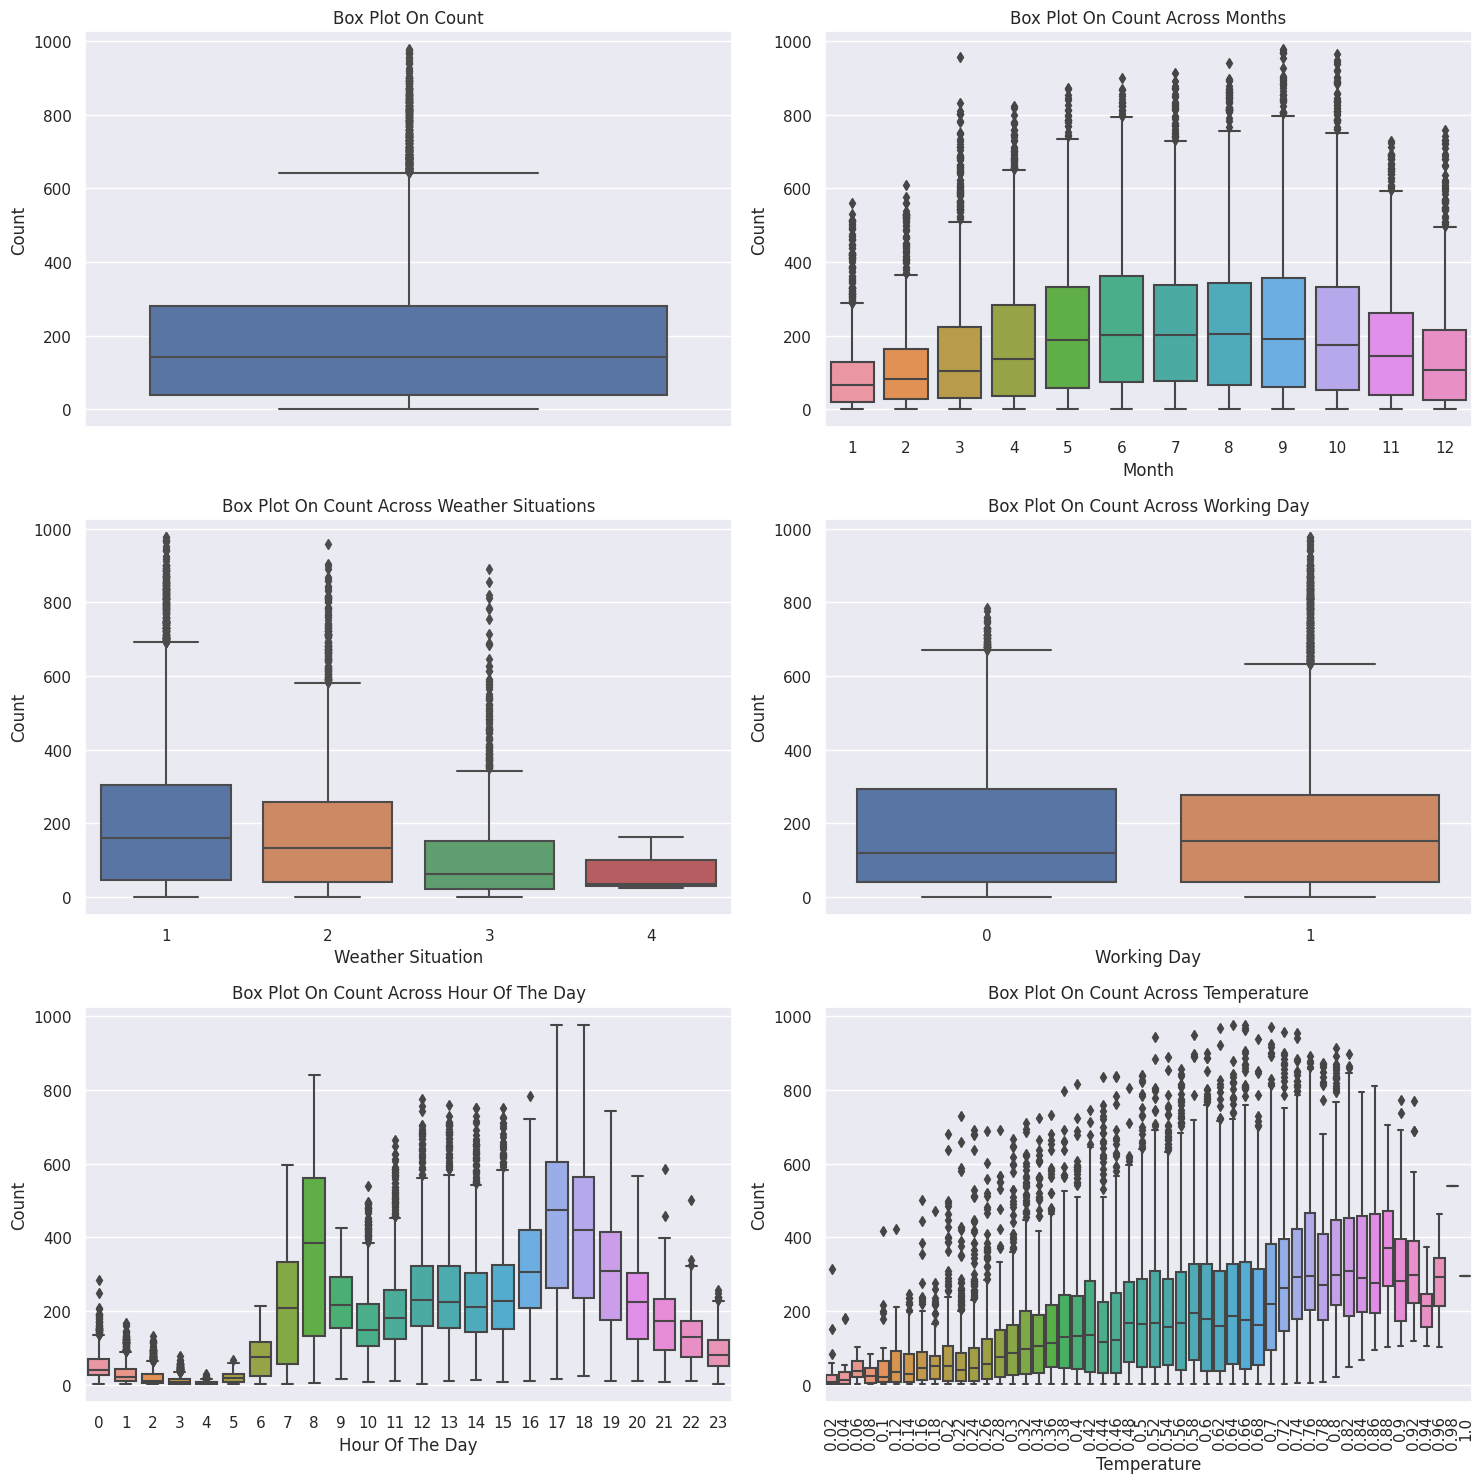

In [ ]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(data=df, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="count", x="month", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="count", x="weather", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="count", x="workingday", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="count", x="hour", orient="v", ax=axes[2][0])
sns.boxplot(data=df, y="count", x="temp", orient="v", ax=axes[2][1])

axes[0][0].set(ylabel='Count', title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count', title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count', title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count', title="Box Plot On Count Across Temperature")
axes[2][1].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels

plt.tight_layout()  # Ensure that labels and ticks fit within the plot area
plt.show()


# **Correlation Plot**


---



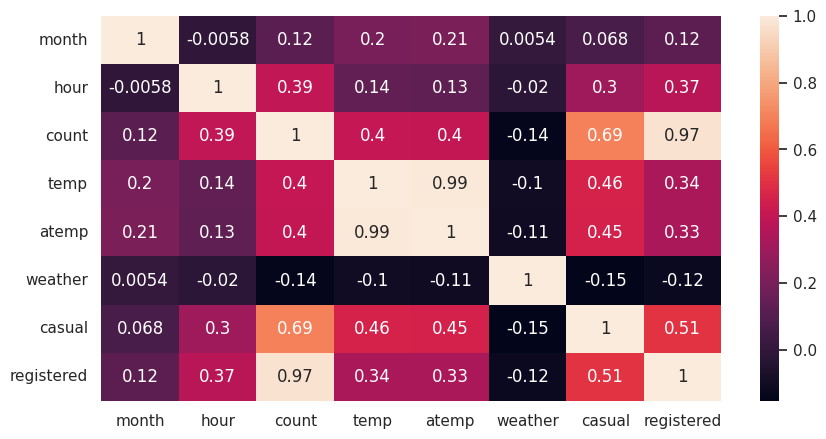

In [ ]:
plt.figure(figsize=[10,5])
# Select the numeric attributes
numeric_cols = ['month', 'hour', 'count', 'temp', 'atemp', 'weather', 'casual', 'registered']

# Create a correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()

# **Regression**

---



**Evaluate the Model**

Common metrics for regression include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). These metrics measure the goodness of fit and predictive accuracy.

**List Of Regression Models**

Ridge Regression, Support Vector Regression, Ensemble Regressor, Random Forest Regressor

In [ ]:
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

features = ['season', 'year', 'month', 'hour', 'holiday', 'Day', 'workingday', 'weather', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
target = 'count'

# Split the DataFrame into training and validation datasets
train = df.sample(frac=0.8, random_state=42)  # 80% for training
val = df.drop(train.index)  # 20% for validation

# Extract feature and target arrays
x_train = train[features].values
y_train = train[target].values
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = val[features].values

# Create a table for model evaluation
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

# List of regression models
models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=0.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(base_estimator=KNeighborsRegressor(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators=300)
]

# Train models and evaluate them
for model in models:
    model.fit(x_train, y_train)
    y_res = model.predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


+-----------------------+--------------------------------+----------------------------+
|         Model         |       Mean Squared Error       |          R² score          |
+-----------------------+--------------------------------+----------------------------+
|      SGDRegressor     | 144819163858055913497690112.00 | -4254497266532227219456.00 |
|         Lasso         |              0.00              |            1.00            |
|       ElasticNet      |              0.00              |            1.00            |
|         Ridge         |              0.00              |            1.00            |
|          SVR          |              0.01              |            1.00            |
|          SVR          |            32326.91            |            0.05            |
|    BaggingRegressor   |              9.54              |            1.00            |
|    BaggingRegressor   |            1765.56             |            0.95            |
|         NuSVR         |       

**Random Forest Model**

In [ ]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]

# Model training
model = RandomForestRegressor(n_estimators=200, min_samples_split=4, random_state=None)
model.fit(x_train, y_train)

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)


+-----------------------+------------+------+------+-------+----------+
|         Model         |  Dataset   | MSE  | MAE  | RMSLE | R² score |
+-----------------------+------------+------+------+-------+----------+
| RandomForestRegressor |  training  | 1.30 | 0.39 |  0.00 |   1.00   |
| RandomForestRegressor | validation | 6.61 | 0.97 |  0.01 |   1.00   |
+-----------------------+------------+------+------+-------+----------+


**Feature Importance**

---



In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature registered (0.947873)
2. feature casual (0.051893)
3. feature hum (0.000046)
4. feature windspeed (0.000038)
5. feature hour (0.000032)
6. feature month (0.000031)
7. feature atemp (0.000026)
8. feature temp (0.000025)
9. feature Day (0.000015)
10. feature season (0.000008)
11. feature weather (0.000005)
12. feature year (0.000004)
13. feature workingday (0.000003)
14. feature holiday (0.000001)


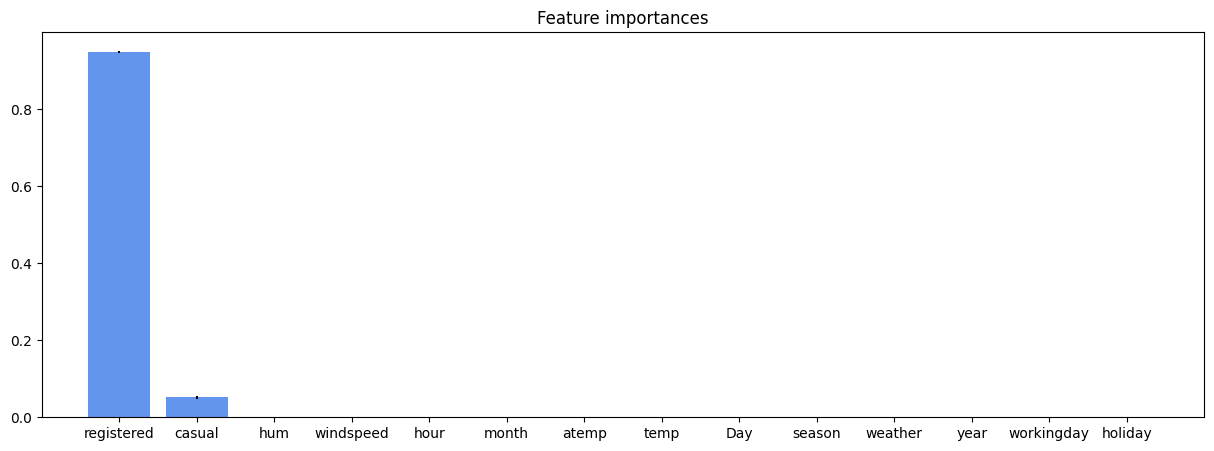

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()

The result corresponds to the high correlation of the registered and casual usage variable with the bike sharing count in the feature correlation matrix.

